In [1]:
import ee

ee.Initialize()

In [2]:
import geemap

In [3]:
geemap.set_proxy(port=4780,ip="http://127.0.0.1",timeout=300)

In [4]:
Map = geemap.Map(center=[36.15, -114.9], zoom=10)
Map

Map(center=[36.15, -114.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [5]:
sent1_ts = geemap.sentinel1_timeseries(
    start_year="2019",
    end_year="2022",
    start_date="01-01",
    end_date="06-30",
    frequency="quarter",
    clip=True,
)

In [6]:
collection = sent1_ts

images = collection.toList(collection.size())
dates = geemap.image_dates(collection).getInfo()
size = images.size().getInfo()

for i in range(size):
    image = ee.Image(images.get(i))
    Map.addLayer(image, {"min": -18, "max": -4}, dates[i])

In [7]:
geometry = ee.Geometry.Polygon(
    [
        [
            [5.022428845214826, 47.392003920544134],
            [5.022428845214826, 47.26331769905508],
            [5.3681548583984195, 47.26331769905508],
            [5.3681548583984195, 47.392003920544134],
        ]
    ],
    None,
    False,
);

In [8]:
out = geemap.sentinel1_timelapse(
    roi=geometry,
    start_year="2022",
    end_year="2022",
    start_date="01-01",
    end_date="07-31",
    frequency="month",
    frames_per_second=2,
)

Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\xyt556\AppData\Local\Temp\2\36dfaec5-893a-4c9e-b1ff-feb2197ee558.gif
ffmpeg is not installed on your computer.


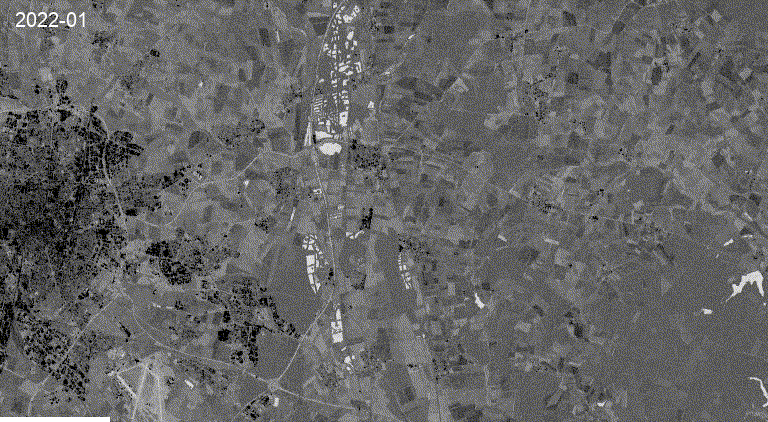

In [9]:
from IPython.display import Image

Image(filename=out)